In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt

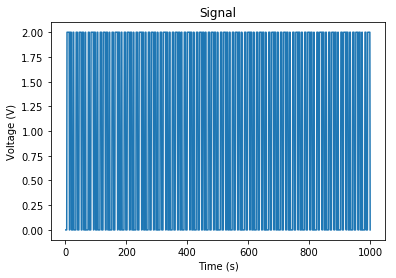

In [25]:
#Binary Sequence 
t = np.linspace(1, 1000, 1000)
x_volts = 1+1*np.sign(np.sin(t/(2*np.pi))-np.tan(t/(np.pi)))
plt.plot(t, x_volts)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

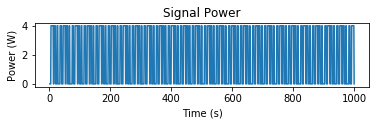

In [26]:
x_watts = x_volts ** 2
plt.subplot(3,1,2)
plt.plot(t, x_watts)
plt.title('Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


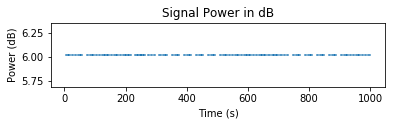

In [27]:
x_db = 10 * np.log10(x_watts)
plt.subplot(3,1,3)
plt.plot(t, x_db)
plt.title('Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts =noise_volts

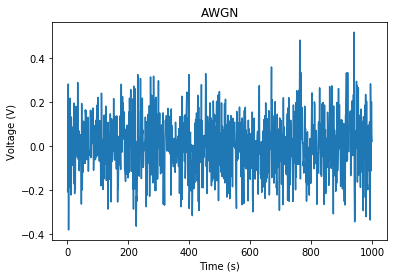

In [28]:
#AWGN
plt.plot(t, y_volts)
plt.title('AWGN')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

In [29]:
#Mean of signal
Mean_signal = np.mean(x_volts)
print("Mean of the signal=", Mean_signal)

#Autocorrelation of signal
Autocorrelation_signal = np.correlate(x_volts, x_volts)
print("Auto-correlation of the signal=", Autocorrelation_signal[0])

Mean of the signal= 1.004
Auto-correlation of the signal= 2008.0


In [30]:
#Mean of AWGN 
Mean_AWGN = np.mean(y_volts)
print("Mean of the AWGN=", Mean_signal)

#Autocorrelation of AWGN
Autocorrelation_AWGN = np.correlate(y_volts, y_volts)
print("Auto-correlation of the AWGN=", Autocorrelation_AWGN[0])

Mean of the AWGN= 1.004
Auto-correlation of the AWGN= 17.410114263235418


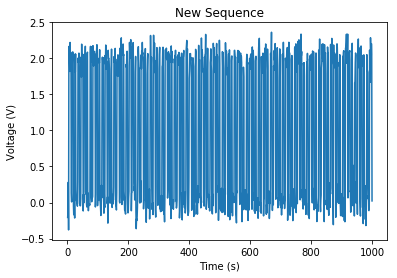

In [31]:
#Adding botb sequences to create a new Signal
new_signal=x_volts+y_volts #Added both sets of sequences
plt.plot(t, new_signal)
plt.title('New Sequence')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

In [32]:
#Mean of the new signal
Mean_signal = np.mean(new_signal)
print("Mean of the new signal=", Mean_signal)

#Autocorrelation of the new Signal
Autocorrelation_signal = np.correlate(new_signal, new_signal)
print("Auto-correlation of the new signal=", Autocorrelation_signal)

Mean of the new signal= 1.0077484179468805
Auto-correlation of the new signal= [2039.86001282]


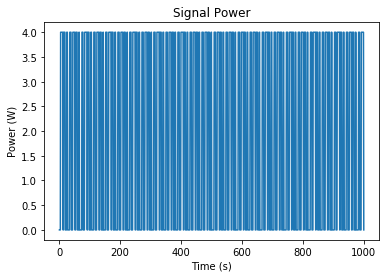

In [33]:
#Power spectrum of spectrum 1 i.e. signal
x_watts = x_volts ** 2
plt.plot(t, x_watts)
plt.title('Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

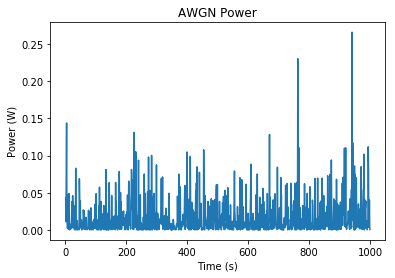

In [34]:
#Power spectrum of AWGN
y_watts = y_volts ** 2
plt.plot(t, y_watts)
plt.title('AWGN Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

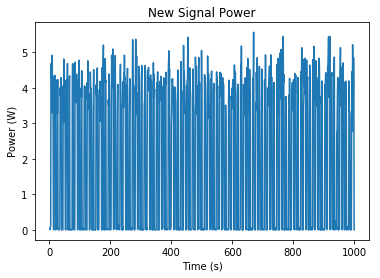

In [35]:
#Power spectrum of New signal
new_signal_watts = new_signal ** 2
plt.plot(t, new_signal_watts)
plt.title('New Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()